# Topic Modeling Using Year 2016

### Imports

In [46]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup
import time
from random import randint
from pymongo import MongoClient
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import NMF, TruncatedSVD
import modules.modeling_module as mm
from spacy.en import STOP_WORDS as stopwords
import string
import numpy as np
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
nlp = spacy.load('en')
stopwords.update(['et', 'al', "'s", "—", '-'])
punctuations = string.punctuation

### Connect to MongoDB

In [2]:
client = MongoClient()
sci = client.metis_p4_db.science

In [3]:
year_2016 = sci.find({'year': 2016})
year_2016[0]

{'_id': ObjectId('59f8f1ca127ab45bd3582636'),
 'description': "Antibiotic resistance threatens to put modern medicine into reverse. But we are not at the end of our options for currently available drugs. Baym et al. review what can be done by using combinations of antibiotics to circumvent bacteria's evolutionary strategies. For instance, resistance to one drug may cause sensitivity to another, the effectiveness of two drugs can be synergized by a resistance mutation, and some negative drug interactions may even be beneficial in selecting against resistance. Although not simple to assess, drug combinations still have something to offer for the development of sorely needed anti-infectives.",
 'title': 'Multidrug evolutionary strategies to reverse antibiotic resistance',
 'year': 2016}

In [4]:
year_2016[0]['description']

"Antibiotic resistance threatens to put modern medicine into reverse. But we are not at the end of our options for currently available drugs. Baym et al. review what can be done by using combinations of antibiotics to circumvent bacteria's evolutionary strategies. For instance, resistance to one drug may cause sensitivity to another, the effectiveness of two drugs can be synergized by a resistance mutation, and some negative drug interactions may even be beneficial in selecting against resistance. Although not simple to assess, drug combinations still have something to offer for the development of sorely needed anti-infectives."

In [5]:
all_descriptions = []

for record in year_2016:
    all_descriptions.append(record['description'])

In [6]:
all_descriptions[:2]

["Antibiotic resistance threatens to put modern medicine into reverse. But we are not at the end of our options for currently available drugs. Baym et al. review what can be done by using combinations of antibiotics to circumvent bacteria's evolutionary strategies. For instance, resistance to one drug may cause sensitivity to another, the effectiveness of two drugs can be synergized by a resistance mutation, and some negative drug interactions may even be beneficial in selecting against resistance. Although not simple to assess, drug combinations still have something to offer for the development of sorely needed anti-infectives.",
 'In carpenter ants, separate behavioral classes, known as castes, are determined by the epigenetic regulation of genes. Simola et al. treated ants of different castes with drugs that affected histone acetylation. Reducing histone acetylation stimulated scouting and foraging behavior. The foraging and scouting behaviors of young ants were permanently changed 

In [7]:
len(all_descriptions)

1877

### Specify tokenizer 3 as this one can change between years

In [8]:
def spacy_tokenizer_3(doc):
    """
    A tokenizer called during vectorization

    INPUT:
    doc - the text to be tokenized

    OUTPUT:
    Tokenized text with the appropriate numbers removed
    """    
    doc = doc.replace('—', '').replace(',', '').replace("'s", '')
    # doc = re.sub('\s\d+(\s)?(,)?', ' ', doc)
    doc = re.sub('\D\d+(\D)?', ' ', doc)
    doc = doc.replace('–', '')
    tokens = nlp(doc)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]     
    return tokens

# Make different vectorizers and test models (LSA, NMF, LDA)

count vectorizer 1

In [11]:
cv_vect1, cv_vect1_transformed = mm.count_vectorizer(spacy_tokenizer_3, 5000, all_descriptions)

In [12]:
mm.use_vectorizer(cv_vect1, cv_vect1_transformed)



-------LSA------


Topic  0
cell new use science human researcher year study research material
Topic  1
material roundup material potential laboratory material information newly potential interest roundup information interest researcher newly offer weekly roundup
Topic  2
cell protein t gene immune t cell mouse tumor cancer expression
Topic  3
cell science research new scientist world u.s researcher cancer national
Topic  4
human gene disease protein genome genetic virus study dna specie
Topic  5
change climate climate change year global specie cell ice increase impact
Topic  6
change protein climate science climate change complex structure policy c carbon
Topic  7
virus protein vaccine zika antibody structure health zika virus infect infection
Topic  8
system issue page page issue quantum state virus immune structure science
Topic  9
use state change virus united research united state human electron quantum


-------NMF------


Topic  0
science research u.s world national scientist 

count vectorizer 2

In [13]:
cv_vect2, cv_vect2_transformed = mm.count_vectorizer(spacy_tokenizer_3, 5000, all_descriptions, ngram_stop=3)

In [14]:
mm.use_vectorizer(cv_vect2, cv_vect2_transformed)



-------LSA------


Topic  0
cell new use science human year study researcher research change
Topic  1
material roundup material potential weekly roundup information newly offer instrumentation apparatus offer instrumentation apparatus laboratory material apparatus laboratory laboratory material
Topic  2
cell protein gene t immune t cell mouse tumor cancer expression
Topic  3
cell science research new scientist world u.s cancer researcher national
Topic  4
human gene disease protein genome genetic virus study specie dna
Topic  5
change climate climate change cell year global specie ice increase temperature
Topic  6
change protein climate science climate change complex structure policy c carbon
Topic  7
virus protein vaccine zika antibody health structure zika virus infect infection
Topic  8
system issue page page issue state quantum virus immune science structure
Topic  9
use state change united virus research united state protein electron structure


-------NMF------


Topic  0
scien

count vectorizer 3

In [15]:
cv_vect3, cv_vect3_transformed = mm.count_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)

In [16]:
mm.use_vectorizer(cv_vect3, cv_vect3_transformed)



-------LSA------


Topic  0
material researcher potential information offer laboratory interest newly apparatus roundup
Topic  1
cell new use science human study year protein research change
Topic  2
cell t protein t cell immune gene tumor mouse cancer tissue
Topic  3
science cell research new world scientist u.s year researcher national
Topic  4
gene human protein disease genome dna genetic virus rna study
Topic  5
change climate climate change specie human ice global year increase cause
Topic  6
system new virus study human researcher use material solar find
Topic  7
virus protein antibody vaccine zika structure infect zika virus infection hiv
Topic  8
system protein new solar ice surface pluto immune complex present
Topic  9
carbon year c plant new reaction bond catalyst researcher enzyme


-------NMF------


Topic  0
material researcher potential information offer laboratory interest roundup newly apparatus
Topic  1
human study new year gene disease researcher genome genetic find

### Lets try tfidf vectorizer to compare

tfidf vectorizer 1

In [17]:
tf_vect1, tf_vect1_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 5000, all_descriptions)

In [18]:
mm.use_vectorizer(tf_vect1, tf_vect1_transformed)



-------LSA------


Topic  0
roundup information weekly instrumentation apparatus information newly laboratory material interest researcher offer instrumentation apparatus laboratory weekly roundup newly offer
Topic  1
cell science new use human research year study change gene
Topic  2
cell protein gene t t cell immune tumor dna expression cancer
Topic  3
cell science cancer t t cell immune research disease tumor virus
Topic  4
cell science t t cell quantum material solar atom state research
Topic  5
climate change cell climate change ice t t cell global impact immune
Topic  6
virus zika vaccine antibody zika virus infect hiv infection viral ebola
Topic  7
carbon reaction c bond catalyst protein science enzyme plant climate
Topic  8
plant year star gravitational reaction planet carbon new researcher wave
Topic  9
protein ice planet structure year surface dna earth climate rna


-------NMF------


Topic  0
instrumentation apparatus offer instrumentation potential interest newly offer i

tfidf vectorizer 2

### This NMF version works well

In [19]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 5000, all_descriptions, ngram_stop=3)

In [20]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed)



-------LSA------


Topic  0
offer instrumentation instrumentation apparatus laboratory apparatus laboratory material apparatus laboratory information newly information newly offer weekly material potential interest instrumentation apparatus interest researcher
Topic  1
cell science new use human research year study change gene
Topic  2
cell protein gene t t cell immune tumor dna expression rna
Topic  3
cell science cancer t t cell immune disease research tumor virus
Topic  4
cell science t t cell quantum material atom research solar electron
Topic  5
protein dna gene science rna structure complex genome enzyme research
Topic  6
virus vaccine zika antibody zika virus infect hiv infection viral ebola
Topic  7
carbon reaction c bond catalyst protein plant enzyme science climate
Topic  8
plant year reaction star gravitational carbon researcher new wave planet
Topic  9
plant specie quantum state atom science evolution social use optical


-------NMF------


Topic  0
information newly pote

tfidf vectorizer 3

In [21]:
tf_vect3, tf_vect3_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)

In [22]:
mm.use_vectorizer(tf_vect3, tf_vect3_transformed)



-------LSA------


Topic  0
newly offer instrumentation apparatus apparatus laboratory laboratory material roundup information information newly potential interest offer instrumentation interest researcher weekly
Topic  1
cell new science use human protein gene change research study
Topic  2
cell t t cell protein immune gene tumor cancer mouse dna
Topic  3
pluto surface solar system new horizon material horizon atom electron quantum
Topic  4
pluto cell new horizon horizon solar system t t cell moon solar system
Topic  5
virus gene protein antibody rna dna vaccine human zika genome
Topic  6
virus antibody vaccine zika infect hiv zika virus viral ebola infection
Topic  7
climate change ice climate change specie plant c global impact temperature
Topic  8
protein carbon complex leucine reaction mtor c bond enzyme science
Topic  9
flow fluid electron plant protein immune graphene response t t cell


-------NMF------


Topic  0
potential interest offer instrumentation weekly roundup roundu

#### Test with tokenizer 1

count vectorizer 1

In [23]:
cv_vect1, cv_vect1_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions)

In [24]:
mm.use_vectorizer(cv_vect1, cv_vect1_transformed)



-------LSA------


Topic  0
cell new use science human researcher study research material change
Topic  1
material roundup material potential information newly instrumentation apparatus interest researcher weekly roundup weekly laboratory material roundup information
Topic  2
cell protein t immune t cell gene mouse tumor cancer expression
Topic  3
cell science research new scientist world u.s researcher national cancer
Topic  4
human gene disease protein genome genetic virus study specie dna
Topic  5
change climate climate change cell 1 global specie ice 2 impact
Topic  6
science change protein climate issue 1 climate change 2 complex structure
Topic  7
issue 1 pageof pageof issue 2 system report 3 science human
Topic  8
virus protein vaccine zika antibody structure zika virus infection health infect
Topic  9
carbon plant reaction use bond catalyst c human metal specie


-------NMF------


Topic  0
new study researcher scientist year time work world find life
Topic  1
material resear

count vectorizer 2

In [25]:
cv_vect2, cv_vect2_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=3)

In [26]:
mm.use_vectorizer(cv_vect2, cv_vect2_transformed)



-------LSA------


Topic  0
cell new use science human study research researcher change protein
Topic  1
material roundup material potential instrumentation apparatus interest researcher laboratory material laboratory material potential weekly roundup information weekly roundup weekly
Topic  2
cell protein t immune gene t cell mouse tumor cancer expression
Topic  3
cell science research new scientist world u.s researcher national cancer
Topic  4
human gene disease protein genome genetic virus study specie dna
Topic  5
change climate climate change 1 cell global specie 2 ice impact
Topic  6
science change protein climate issue 1 complex climate change 2 structure
Topic  7
issue 1 pageof pageof issue 2 system report 3 science human
Topic  8
virus protein vaccine zika antibody structure zika virus infection health infect
Topic  9
plant carbon reaction use bond catalyst new c human metal


-------NMF------


Topic  0
new study researcher scientist year time work find world life
Topic  1


count vectorizer 3

In [27]:
cv_vect3, cv_vect3_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 110000, all_descriptions)

In [28]:
mm.use_vectorizer(cv_vect3, cv_vect3_transformed)



-------LSA------


Topic  0
material researcher potential information offer laboratory interest newly apparatus roundup
Topic  1
cell new use science human study protein change research system
Topic  2
cell t t cell protein immune tumor mouse gene cancer tissue
Topic  3
science cell research new world scientist u.s researcher national institute
Topic  4
gene human protein disease genome genetic dna virus rna study
Topic  5
change climate climate change specie human global 1 ice increase cause
Topic  6
system new virus study human researcher solar surface find use
Topic  7
virus protein antibody zika vaccine structure zika virus infect infection viral
Topic  8
issue 1 pageof pageof issue system 2 science report 3 immune
Topic  9
system protein new change ice surface solar climate pluto year


-------NMF------


Topic  0
material researcher potential information offer laboratory interest roundup newly apparatus
Topic  1
gene human genome dna genetic study disease expression rna mutatio

### Try TFIDF to compare

tfidf vectorizer 1

In [29]:
tf_vect1, tf_vect1_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions)

#### This NMF version worked well

In [30]:
mm.use_vectorizer(tf_vect1, tf_vect1_transformed)



-------LSA------


Topic  0
instrumentation apparatus interest researcher newly offer potential interest weekly roundup roundup information information newly offer instrumentation laboratory material apparatus laboratory
Topic  1
cell science new use human research study change gene protein
Topic  2
cell protein t gene t cell immune tumor dna expression cancer
Topic  3
cell science cancer t t cell research immune disease tumor virus
Topic  4
cell science t t cell quantum material atom research solar electron
Topic  5
protein dna gene rna structure science complex genome enzyme research
Topic  6
virus zika vaccine antibody zika virus infect infection viral ebola outbreak
Topic  7
carbon reaction bond c catalyst plant climate enzyme science methane
Topic  8
protein change climate structure science policy climate change electron state bind
Topic  9
protein ice planet earth surface structure year star solar gravitational


-------NMF------


Topic  0
weekly roundup interest researcher ro

tfidf vectorizer 2

In [31]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=4)

#### This NMF version worked well

In [32]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed)



-------LSA------


Topic  0
instrumentation apparatus potential interest researcher roundup information roundup information newly roundup information newly offer information newly information newly offer interest researcher material potential interest material potential interest researcher
Topic  1
cell science new use human research study change gene protein
Topic  2
cell protein gene t t cell immune tumor dna expression cancer
Topic  3
cell science cancer t t cell research immune tumor disease virus
Topic  4
gene specie human change plant climate genome virus genetic rna
Topic  5
protein dna gene rna structure science complex genome enzyme research
Topic  6
virus zika vaccine antibody zika virus infect infection viral ebola outbreak
Topic  7
carbon reaction bond c catalyst plant climate enzyme protein science
Topic  8
protein change climate structure science climate change policy bind electron rna
Topic  9
ice protein planet earth gravitational star year wave surface plant


------

In [33]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=3)

#### This NMF version one works well

In [34]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed)



-------LSA------


Topic  0
potential interest information newly weekly roundup information weekly roundup apparatus laboratory material weekly laboratory material potential laboratory material offer instrumentation apparatus offer instrumentation
Topic  1
cell science new use human research study change gene protein
Topic  2
cell protein gene t t cell immune tumor dna cancer expression
Topic  3
cell science cancer t t cell research immune tumor disease virus
Topic  4
gene specie human change plant climate genome virus genetic rna
Topic  5
protein dna gene rna structure science complex genome enzyme research
Topic  6
virus zika vaccine antibody zika virus infect infection viral ebola outbreak
Topic  7
carbon reaction bond c catalyst plant climate enzyme science protein
Topic  8
plant reaction study researcher new star carbon gravitational catalyst wave
Topic  9
protein ice planet earth star gravitational year surface structure solar


-------NMF------


Topic  0
offer instrumentation

tfidf vectorizer 3

In [35]:
tf_vect3, tf_vect3_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 110000, all_descriptions)

In [36]:
mm.use_vectorizer(tf_vect3, tf_vect3_transformed)



-------LSA------


Topic  0
potential interest offer instrumentation information newly newly offer laboratory material apparatus laboratory weekly roundup weekly instrumentation apparatus roundup information
Topic  1
cell new science use human protein gene change system study
Topic  2
cell t t cell immune protein gene tumor cancer mouse tissue
Topic  3
surface pluto solar system material new horizon atom horizon electron quantum
Topic  4
pluto cell new horizon horizon solar system surface moon solar system t
Topic  5
gene protein virus rna antibody dna human vaccine genome zika
Topic  6
virus antibody zika vaccine infect zika virus viral ebola ebola virus infection
Topic  7
climate change ice climate change specie plant global co2 impact increase
Topic  8
carbon bond c reaction h catalyst – enzyme c – complex
Topic  9
protein structure leucine mtorc1 electron climate change bind complex t


-------NMF------


Topic  0
potential interest instrumentation apparatus information newly wee

# The following is the best and final model and the topics returned

In [43]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=3)
norm = Normalizer()
vect_normalized = norm.fit_transform(tf_vect2_transformed)
model, model_transformed = mm.nmf_tfidf(vect_normalized, n_comp=10)

-------NMF------


Topic  0

offer instrumentation instrumentation apparatus laboratory apparatus laboratory material weekly roundup weekly roundup information weekly roundup information interest researcher newly offer newly offer instrumentation

Topic  1

planet star earth gravitational wave galaxy year solar surface crater

Topic  2

cell t t cell immune tumor cancer tissue immune cell mouse stem

Topic  3

quantum electron material atom optical state magnetic use device particle

Topic  4

science research new u.s world scientist national university institute researcher

Topic  5

climate change climate change global specie ecosystem temperature policy impact increase

Topic  6

virus zika vaccine antibody zika virus infect infection health viral ebola

Topic  7

reaction carbon bond catalyst c metal molecule hydrogen methane organic

Topic  8

plant crop soil growth specie yield light sugar red pathway

Topic  9

gene protein dna rna genome genetic human complex expression function

### Finally, try more topics

In [40]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=3)

In [42]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed, n_comp=6)



-------LSA------


Topic  0
potential interest researcher weekly roundup information offer instrumentation newly offer information newly offer weekly roundup information newly potential interest weekly instrumentation apparatus laboratory
Topic  1
cell science new use human research study change gene protein
Topic  2
cell protein gene t t cell immune tumor dna cancer expression
Topic  3
cell science cancer t t cell research immune tumor disease virus
Topic  4
cell science t t cell quantum material atom solar electron research
Topic  5
climate change cell climate change ice t t cell temperature global impact


-------NMF------


Topic  0
offer instrumentation apparatus interest researcher instrumentation apparatus laboratory laboratory material potential newly offer instrumentation newly offer material potential interest apparatus laboratory material laboratory material roundup information newly
Topic  1
gene protein dna rna genome genetic complex human function expression
Topic  2
ce

In [40]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=3)

In [41]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed, n_comp=20)



-------LSA------


Topic  0
potential interest information newly weekly roundup information weekly roundup apparatus laboratory material weekly laboratory material potential laboratory material offer instrumentation apparatus offer instrumentation
Topic  1
cell science new use human research study change gene protein
Topic  2
cell protein gene t t cell immune tumor dna cancer expression
Topic  3
cell science cancer t t cell research immune tumor disease virus
Topic  4
gene specie plant change human climate genome virus genetic rna
Topic  5
protein dna gene rna science structure complex genome enzyme research
Topic  6
virus zika vaccine antibody zika virus infect infection viral ebola health
Topic  7
carbon reaction bond catalyst c plant climate enzyme co2 methane
Topic  8
plant star planet gravitational carbon galaxy earth wave reaction year
Topic  9
protein ice earth structure planet cell star gravitational surface crater
Topic  10
plant protein light science system crop signal immu

#### Try t-sne

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1877 samples in 0.002s...
[t-SNE] Computed neighbors for 1877 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1877
[t-SNE] Computed conditional probabilities for sample 1877 / 1877
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 85.8360062, gradient norm = 0.1425831 (50 iterations in 2.419s)
[t-SNE] Iteration 100: error = 74.6411667, gradient norm = 0.0480437 (50 iterations in 1.648s)
[t-SNE] Iteration 150: error = 72.3865204, gradient norm = 0.0350002 (50 iterations in 1.517s)
[t-SNE] Iteration 200: error = 71.5413818, gradient norm = 0.0195318 (50 iterations in 1.632s)
[t-SNE] Iteration 250: error = 71.1872025, gradient norm = 0.0154876 (50 iterations in 1.314s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.187202
[t-SNE] Iteration 300: error = 1.4056250, gradient norm = 0.0012930 (50 iterations in 1.413s)

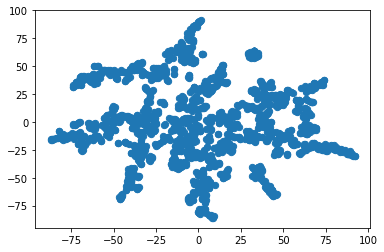

In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

tsne_model = TSNE(n_components=2, random_state=0,verbose=2, perplexity=10)
low_data = tsne_model.fit_transform(model_transformed)

# num_points = 1877
# num_clust = 10

# colorize = []
# for i in range(num_clust):
#   for _ in range(num_points):
#        colorize.append(plt.cm.rainbow(i*20))
        
x,y = zip(*low_data)
plt.scatter(x, y, s=40);

# Plot the distribution of topics for 2016

In [44]:
yearly_counts = {}
for topic in range(0,10):
    yearly_counts[topic] = 0

yearly_counts

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [47]:
# Topics 0-9 as keys and the index for each document in that topic
topic_dict = {}
for topic in range(0,10):
    topic_dict[topic] = []
for index, item in enumerate(model_transformed):
    topic_num = np.argmax(item)
    topic_dict[topic_num].append(index)

In [48]:
for topic_number in range(0,10):
    for item in topic_dict[topic_number]:
        doc_index = item
        # print(doc_index, doc)
        yearly_counts[topic_number] += 1

In [49]:
yearly_counts

{0: 52, 1: 132, 2: 213, 3: 224, 4: 352, 5: 297, 6: 116, 7: 127, 8: 84, 9: 280}

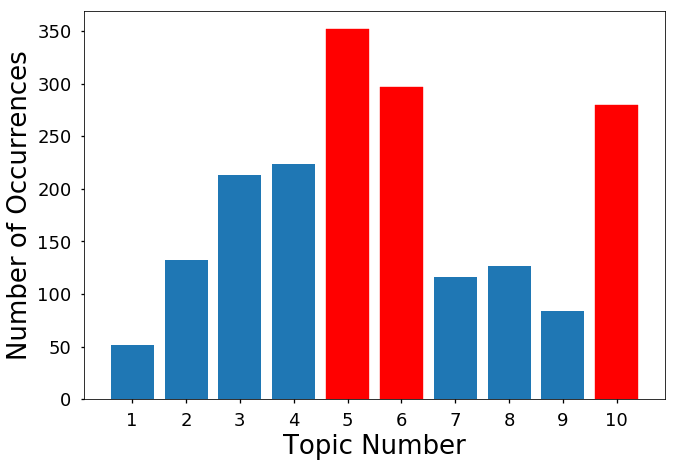

In [53]:
plot = plt.bar(range(len(yearly_counts)), yearly_counts.values(), align='center')
plt.xticks(range(len(yearly_counts)), range(1,11), fontsize=18)
plt.xlabel('Topic Number', fontsize=26)
plt.ylabel('Number of Occurrences', fontsize=26)
plt.yticks(fontsize=18)
plot[4].set_color('r')
plot[5].set_color('r')
plot[9].set_color('r')
save_path = '/Users/murdock/Documents/metis/project4/2016_topics_colored.png'
plt.savefig(save_path, bbox_inches='tight');